# Business Problem
O CEO da House Rocket Company, deseja comprar casas com preço baixo e revende-lás com o preço mais alto.
Encontre bons negócios dentro do portfólio disponível, ou seja, encontrar casas com preço baixo, em ótima localização e que tenham um ótimo potencial de venda

* **OBJECTIVE:**
    * Quais são os imóveis que a House Rocket deveria comprar e por qual preço?
    * Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?
       * 1- Se o preço da compra for maior que a mediana da região + sazonalidade. O preço da venda será igual ao preço da compra + 10%
       * 2- Se o preço da compra for menor que a mediana da região + sazonalidade. O preço da venda será igual ao preço da compra + 30%

### HYPHOTESIS

* **H1:** Imóveis que possuem vista para água são 30% mais caros, na média.
* **H2:** Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
* **H3:** Imóveis sem porão possuem área total (sqrt_lot), são 40% maiores do que os imóveis com porão.
* **H4:** O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
* **H5:** Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
* **H6:** Imóveis com mais de 3 quartos, tem a sala de estar 30% maior, na média.
* **H7:** Imóveis com construção e design de alta qualidade de 11 a 13 são 50% mais caros, na média.
* **H8:** Imóveis com o sotão com mais de 3500m² são 30% mais caros, na média.
* **H9:** Os preços dos imóveis são 20% mais caros na temporada de verão e primavera do que na temporada de inverno e outono, na média.
* **H10:** Imóveis com mais de 2 andares são 35% mais caros, na média.

# Business Results

<p>Esse projeto tinha o propósito de gerar <b>Insights</b> para a House Rocket Company, para poder comprar os imóveis pelo melhor preço e lucrar com as vendas com as condições impostas pelo CEO.</p>
<p>Com as condições de venda impostas pelo CEO, a empresa House Rocket teria um lucro de <b>US$ 2.016.458.904.40</b></p>

# 1.0 Imports

In [116]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# 2.0 Functions

In [117]:
def save_report(report, path):
    report.to_csv(path, index=False)
    
    return None

def get_percent(data):
    x = data.iloc[0,1]
    y = data.iloc[1,1]
    
    if (x > y):
        x1 = ((x - y) / y) * 100
        x1 = round(x1)
    else:
        x1 = ((y - x) / x) * 100
        x1 = round(x1)
        
    print('the PERCENT is: {}%'.format(x1))
    
    return None

def make_barplot(data, x, y):
    fig, ax = plt.subplots(figsize=(8,6))

    sns.barplot(data=data, x= x, y= y, ax=ax, palette='twilight')
    
    ax.set_facecolor('#EAEAF2')
    ax.set_xlabel(x, fontdict={'fontsize':14})
    ax.set_ylabel(y, fontdict={'fontsize':14})
    ax.tick_params(labelsize=14)
    fig.tight_layout()
    
    return None

# 3.0 Loading dataset

In [118]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 3.1 Descriptive Analysis

In [119]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.00,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.00,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.00,3.41,0.65,1.00,3.00,3.00,4.00,5.00


# 4.0 Data Cleaning

In [120]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [121]:
data['date'] = pd.to_datetime(data['date'])

In [122]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 5.0 Feature Engineering

In [123]:
data['year'] = data['date'].dt.year

data['month_year'] = data['date'].dt.strftime('%Y-%m')

In [124]:
for i in range(len(data)):
    if (data.loc[i,'month_year'] == '2014-03') | (data.loc[i,'month_year'] == '2014-04') | (data.loc[i,'month_year'] == '2014-05'):
        data.loc[i,'season'] = 'spring'
    
    elif (data.loc[i,'month_year'] == '2014-06') | (data.loc[i,'month_year'] == '2014-07') | (data.loc[i,'month_year'] == '2014-08'):
        data.loc[i,'season'] = 'summer'
    
    elif (data.loc[i,'month_year'] == '2014-09') | (data.loc[i,'month_year'] == '2014-10') | (data.loc[i,'month_year'] == '2014-11'):
        data.loc[i,'season'] = 'fall'
    
    elif (data.loc[i,'month_year'] == '2014-12') | (data.loc[i,'month_year'] == '2015-01') | (data.loc[i,'month_year'] == '2015-02'):
        data.loc[i,'season'] = 'winter'
    
    else:
        data.loc[i,'season'] = 'spring'

# 6.0 EDA - Hyphotesis validations

## H1: Imóveis que possuem vista para água são 30% mais caros, na média.
**TRUE:** Imóveis com vista para a água são 213% mais caros, na média.

In [125]:
hypo1 = data[['waterfront','price']].groupby('waterfront').mean().reset_index()
hypo1

,waterfront,price
0,0,531563.60
1,1,1661876.02


the PERCENT is: 213%


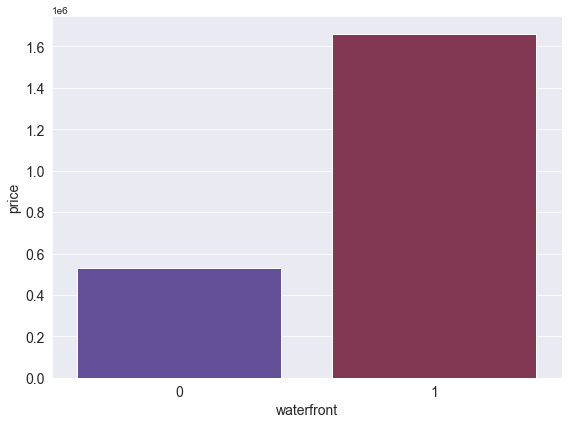

In [126]:
get_percent(hypo1)
make_barplot(hypo1, 'waterfront', 'price')

## H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
**FALSE:** Imóveis com data de construção menor que 1995 são 2% mais baratos, na média.

In [127]:
hypo2 = data[['price','yr_built']].copy()

hypo2['status'] = 'NA'

for i in range(len(hypo2)):
    if (hypo2.loc[i, 'yr_built'] <= 1955):
        hypo2.loc[i,'status'] = 'old'
    else:
        hypo2.loc[i,'status'] = 'new'
        
hypo2.drop(['yr_built'], axis=1, inplace=True)
hypo2 = hypo2.groupby('status')['price'].mean().reset_index()
hypo2

,status,price
0,new,542917.16
1,old,533415.43


the PERCENT is: 2%


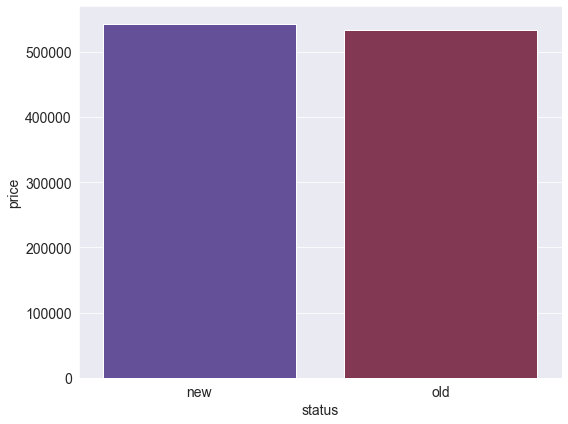

In [128]:
get_percent(hypo2)
make_barplot(hypo2, 'status', 'price')

# H3: Imóveis sem porão possuem área total (sqrt_lot), são 40% maiores do que os imóveis com porão, na média.
**FALSE**: Imóveis sem porão são 23% maiores do que os imóveis com porão, na média.

In [129]:
hypo3 = data[['sqft_basement', 'sqft_lot']].copy()

hypo3['status'] = 'NA'

for i in range(len(hypo3)):
    if (hypo3.loc[i,'sqft_basement'] != 0):
        hypo3.loc[i,'status'] = 'with_basement'
    else:
        hypo3.loc[i,'status'] = 'no_basement'
        
hypo3.drop(['sqft_basement'], axis=1, inplace=True)
hypo3 = hypo3.groupby('status')['sqft_lot'].mean().reset_index()
hypo3

,status,sqft_lot
0,no_basement,16284.18
1,with_basement,13286.29


the PERCENT is: 23%


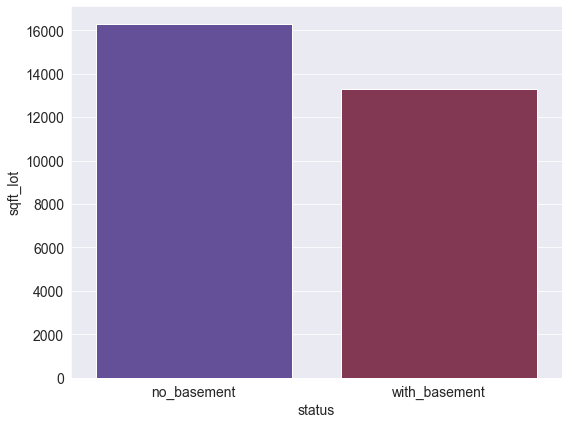

In [130]:
get_percent(hypo3)
make_barplot(hypo3, 'status', 'sqft_lot')

# H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%.
**FALSE:** O crescimento é de apenas 1%.

In [131]:
hypo4 = data[['price','year']].copy()
hypo4 = hypo4.groupby('year')['price'].mean().reset_index()
hypo4

,year,price
0,2014,539181.43
1,2015,541988.99


the PERCENT is: 1%


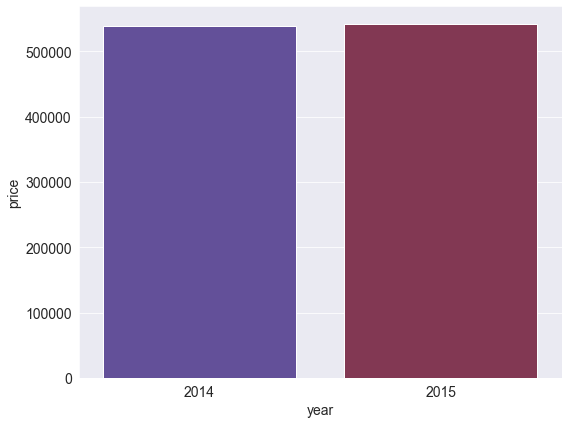

In [132]:
get_percent(hypo4)
make_barplot(hypo4, 'year', 'price')

# H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
**FALSE:** O crescimento MoM não é constante igual a 15%.

In [133]:
hypo5 = data[['bathrooms','month_year','price']].copy()
hypo5.drop(hypo5[hypo5.bathrooms != 3].index, inplace=True)
hypo5 = hypo5.groupby('month_year')['price'].mean().reset_index()

hypo5['difference'] = hypo5['price'].diff(1)
hypo5['MoM percent'] = round((hypo5['difference'] / hypo5['price']) * 100)
hypo5

,month_year,price,difference,MoM percent
0,2014-05,690080.71,NaN,NaN
1,2014-06,775057.56,84976.85,11.00
2,2014-07,741405.04,-33652.52,-5.00
3,2014-08,737576.56,-3828.48,-1.00
4,2014-09,645246.89,-92329.68,-14.00
5,2014-10,645523.02,276.13,0.00
6,2014-11,679910.47,34387.45,5.00
7,2014-12,728341.19,48430.72,7.00
8,2015-01,672923.17,-55418.02,-8.00
9,2015-02,696714.42,23791.25,3.00


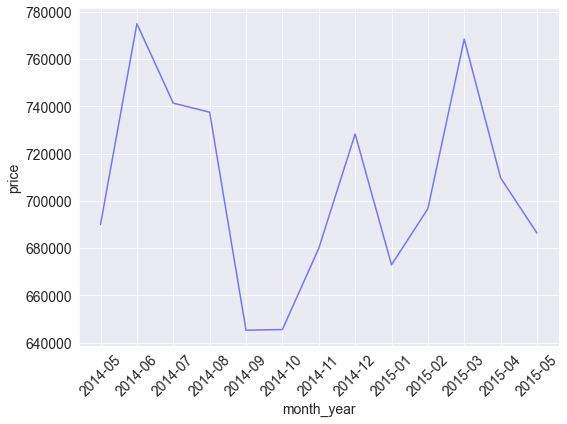

In [157]:
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data= hypo5, x='month_year', ax=ax, y='price', color='b', alpha=0.5)

ax.set_xlabel('month_year', fontdict={'fontsize':14})
ax.set_ylabel('price', fontdict={'fontsize':14})
ax.tick_params(labelsize=14)


plt.xticks(rotation=45);
fig.tight_layout()

# H6:  Imóveis com mais de 3 quartos, tem a sala de estar 30% maior, na média.
**TRUE:** Imóveis com mais de 3 quartos tem a sala de estar 82% maior.

In [135]:
hypo6 = data[['bedrooms','sqft_living']].copy()
hypo6['status'] = 'NA'

for i in range(len(hypo6)):
    if (hypo6.loc[i,'bedrooms'] >= 3):
        hypo6.loc[i,'status'] = 'three more bedrooms'
    else:
        hypo6.loc[i,'status'] = 'less bedrooms'

hypo6.drop(['bedrooms'], axis= 1, inplace=True)
hypo6 = hypo6.groupby('status')['sqft_living'].mean().reset_index()

hypo6

,status,sqft_living
0,less bedrooms,1218.02
1,three more bedrooms,2217.31


the PERCENT is: 82%


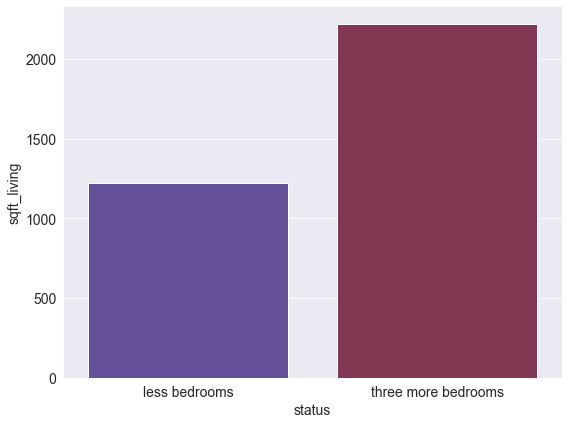

In [136]:
get_percent(hypo6)
make_barplot(hypo6, 'status','sqft_living')

# H7: Imóveis com construção e design de alta qualidade de 11 a 13 são 50% mais caros, na média.
**TRUE:** Imóveis com construção e design de alta qualidade são 227% mais caros.

In [137]:
hypo7 = data[['grade','price']].copy()
hypo7['status'] = 'NA'

for i in range(len(hypo7)):
    if (hypo7.loc[i,'grade']) <= 10:
        hypo7.loc[i,'status'] = 'low quality'
    else:
        hypo7.loc[i,'status'] = 'high quality'

hypo7.drop(['grade'], axis=1, inplace=True)
hypo7 = hypo7[['status','price']].groupby('status').mean().reset_index()

hypo7

,status,price
0,high quality,1678635.12
1,low quality,513014.55


the PERCENT is: 227%


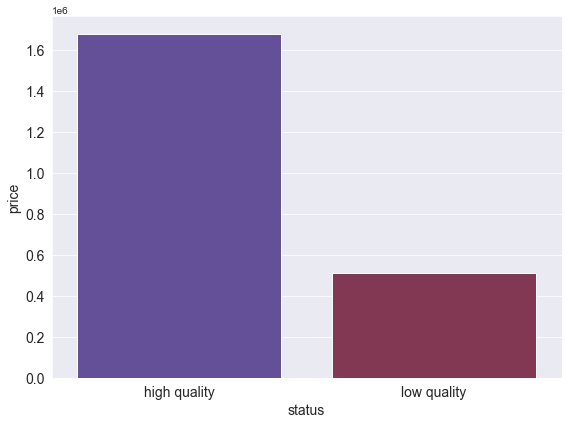

In [138]:
get_percent(hypo7)
make_barplot(hypo7, 'status','price')

# H8:  Imóveis com o sotão com mais de 3500m² são 30% mais caros, na média.
**TRUE:** Imóveis com o sotão com mais de 3500m² são 163% mais caros, na média.

In [139]:
hypo8 = data[['sqft_above','price']].copy()
hypo8['status'] = 'NA'

for i in range(len(hypo8)):
    if (hypo8.loc[i,'sqft_above'] < 3500):
        hypo8.loc[i,'status'] = 'small_above'
    else:
        hypo8.loc[i,'status'] = 'large_above'
        
hypo8.drop(['sqft_above'], axis=1, inplace=True)
hypo8 = hypo8[['status','price']].groupby('status').mean().reset_index()
hypo8

,status,price
0,large_above,1328339.21
1,small_above,505321.32


the PERCENT is: 163%


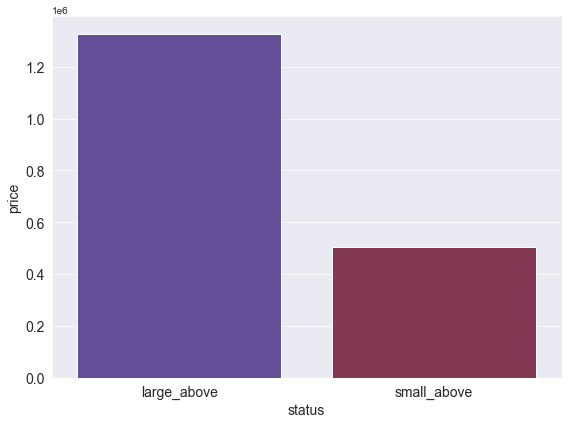

In [140]:
get_percent(hypo8)
make_barplot(hypo8, 'status','price')

# H9: Os preços dos imóveis são 20% mais caros na temporada de verão e primavera do que na temporada de inverno e outono, na média.
**FALSE:** Os imóveis das temporadas de verão e primavera são 5% mais caros, na média.

In [141]:
hypo9 = data[['season','price']].copy()
hypo9 = hypo9[['season','price']].groupby('season').mean().reset_index()

season_mean = pd.DataFrame()
season_mean.loc[0,'status'] = 'fall_winter'
season_mean.loc[1,'status'] = 'summer_spring'

season_mean.loc[0,'price_mean'] = hypo9.loc[0,'price'] + hypo9.loc[3,'price']
season_mean.loc[1,'price_mean'] = hypo9.loc[1,'price'] + hypo9.loc[2,'price']
season_mean

,status,price_mean
0,fall_winter,1050067.75
1,summer_spring,1099385.20


the PERCENT is: 5%


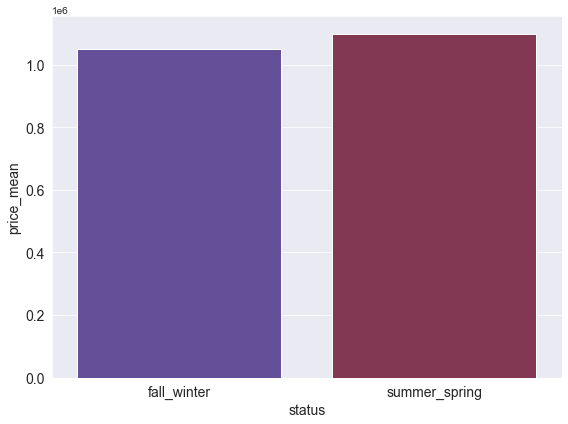

In [142]:
get_percent(season_mean)
make_barplot(season_mean, 'status','price_mean' )

# H10: Imóveis com mais de 2 andares são 35% mais caros, na média.
**FALSE:** Imóveis com mais de 2 andares são 28% mais caros, na média.

In [143]:
hypo10 = data[['price','floors']].copy()
hypo10['status'] = 'NA'

for i in range(len(hypo10)):
    if (hypo10.loc[i,'floors'] < 2):
        hypo10.loc[i,'status'] = 'little_floors'
    else:
        hypo10.loc[i,'status'] = 'many floors'
        
hypo10.drop(['floors'], axis=1, inplace=True)
hypo10 = hypo10[['status','price']].groupby('status').mean().reset_index()
hypo10

,status,price
0,little_floors,459900.09
1,many floors,651976.37


the PERCENT is: 42%


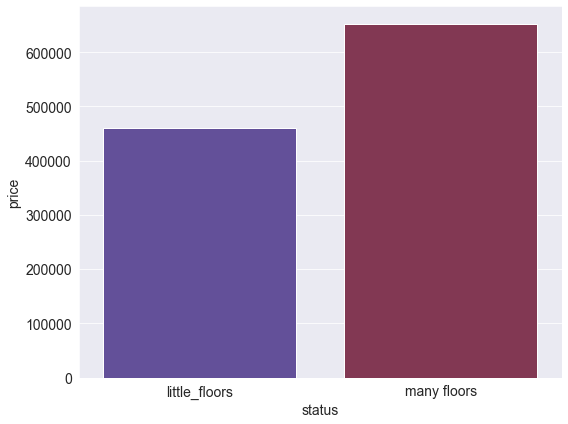

In [144]:
get_percent(hypo10)
make_barplot(hypo10, 'status','price')

# 7.0 Business Questions

## 7.1 Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

In [145]:
df1 = data[['zipcode','price']].groupby('zipcode').median().reset_index()
df2 = data[['id','zipcode','condition','price']]
df3 = pd.merge(df1, df2, on='zipcode', how='inner')

df3.columns = ['zipcode','price_median','id','condition_house','price']
report = df3[['id','zipcode','condition_house','price','price_median']].sort_values('zipcode')

report['buy'] = 'NA'

for i in range(len(report)):
    if (report.loc[i,'condition_house'] >= 3) & (report.loc[i,'price'] <= report.loc[i,'price_median']):
        report.loc[i,'buy'] = 'yes'
    else:
        report.loc[i,'buy'] = 'no'

report.head(12)

,id,zipcode,condition_house,price,price_median,buy
0,7895500070,98001,2,240000.00,260000.00,no
246,8856000545,98001,3,100000.00,260000.00,yes
245,3422049088,98001,4,389000.00,260000.00,no
244,4012800010,98001,5,360000.00,260000.00,no
243,3876500290,98001,3,175000.00,260000.00,yes
242,5412100920,98001,3,250000.00,260000.00,yes
241,8001600130,98001,3,289950.00,260000.00,no
240,3353400840,98001,4,230000.00,260000.00,yes
239,3717000250,98001,3,321000.00,260000.00,no
247,1311800130,98001,3,162500.00,260000.00,yes


In [146]:
save_report(report, 'purchasing_report.csv')

## 7.2 Uma vez o imóvel comprado, qual o melhor momento para vendê-lo e por qual preço?

* 1- Se o preço da compra for maior que a mediana da região + sazonalidade. O preço da venda será igual ao preço da compra + 10%
* 2- Se o preço da compra for menor que a mediana da região + sazonalidade. O preço da venda será igual ao preço da compra + 30%

In [147]:
df1 = data[['id','price','zipcode','season']]
df2 = data[['zipcode', 'price','season']].groupby(['zipcode','season']).median().reset_index()

df3 = pd.merge(df1, df2, on=['zipcode','season'],how='inner')

df3.columns = ['id','price','zipcode','season','price_median']
report_sell = df3[['id','zipcode','season','price','price_median']].sort_values('zipcode')

report_sell['sales_price'] = 'NA'
report_sell['status'] = 'NA'

for i in range(len(report_sell)):
    if (report_sell.loc[i,'price'] > report_sell.loc[i,'price_median']):
        report_sell.loc[i,'sales_price'] = report_sell.loc[i,'price'] * 1.1
        report_sell.loc[i,'status'] = 1
    else:
        report_sell.loc[i,'sales_price'] = report_sell.loc[i,'price'] * 1.3
        report_sell.loc[i,'status'] = 2
        
report_sell.head(15)

,id,zipcode,season,price,price_median,sales_price,status
5479,6699300210,98001,fall,321500.00,249900.00,353650.00,1
15106,7351000160,98001,summer,332000.00,262500.00,365200.00,1
15107,2744000100,98001,summer,299950.00,262500.00,329945.00,1
15108,3521049048,98001,summer,515000.00,262500.00,566500.00,1
15109,6648760100,98001,summer,299950.00,262500.00,329945.00,1
15110,3751600457,98001,summer,299000.00,262500.00,328900.00,1
15111,304100090,98001,summer,215000.00,262500.00,279500.00,2
15112,3751603173,98001,summer,212500.00,262500.00,276250.00,2
15113,3751601501,98001,summer,382450.00,262500.00,420695.00,1
15114,3751606513,98001,summer,263400.00,262500.00,289740.00,1


In [148]:
save_report(report_sell, 'sales_report.csv')

In [149]:
price = report_sell[['status','price']].groupby('status').sum().reset_index()
sales = report_sell[['status','sales_price']].groupby('status').sum().reset_index()

report_profit = pd.merge(price, sales, on='status', how='inner')

report_profit.loc[0,'profit'] = report_profit.loc[0,'sales_price'] - report_profit.loc[0,'price']
report_profit.loc[1,'profit'] = report_profit.loc[1,'sales_price'] - report_profit.loc[1,'price']

report_profit.loc[0,'gain_total'] = report_profit.loc[0,'profit'] + report_profit.loc[1,'profit']

report_profit.columns = ['sale_condition','purchase_price','sale_price','sales_profit','gain_total']

report_profit

,sale_condition,purchase_price,sale_price,sales_profit,gain_total
0,1,7427092990.00,8169802289.00,742709299.00,2016458904.40
1,2,4245832018.00,5519581623.40,1273749605.40,NaN


In [150]:
save_report(report_profit,'report_profit.csv')